In [2]:
import pandas as pd
import os
import numpy as np
import glidertools as gt

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import cmocean
import netCDF4
from netCDF4 import Dataset
import xarray as xa

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [3]:
# full path to datafiles
filenames = '/Users/anjalishah/Desktop/EcoFOCI2024/Data/CTDDY2306/CTD_preliminary_data/' #cast data
nutrients_prelim = pd.read_csv('/Users/anjalishah/Desktop/EcoFOCI2024/Data/CTDDY2306/nutrients_prelim.csv') #nutrient data


In [4]:
#load a range of files
file_range = range(1, 79)
file_pattern = [os.path.join(filenames, f"DY2306c{i:03d}_ctd.nc") for i in file_range]

#store all files in a dictionary
net_cdf_files = {}
for i, name in enumerate(file_pattern):
    net_cdf_files[name[-10:-7]] = (xa.open_dataset(file_pattern[i]))

print(net_cdf_files.keys())

#figure out ice proximate CTD casts --> export locations! 
ctd_locs = pd.DataFrame(columns=['id', 'latitude', 'longitude', ])
for i, name in enumerate(net_cdf_files):
    lat = net_cdf_files[name].latitude.values
    lon = net_cdf_files[name].longitude.values
    lon = net_cdf_files[name].longitude.values
    id = name 
    ctd_locs.loc[i] = id, lat, lon

dict_keys(['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074', '075', '076', '077', '078'])


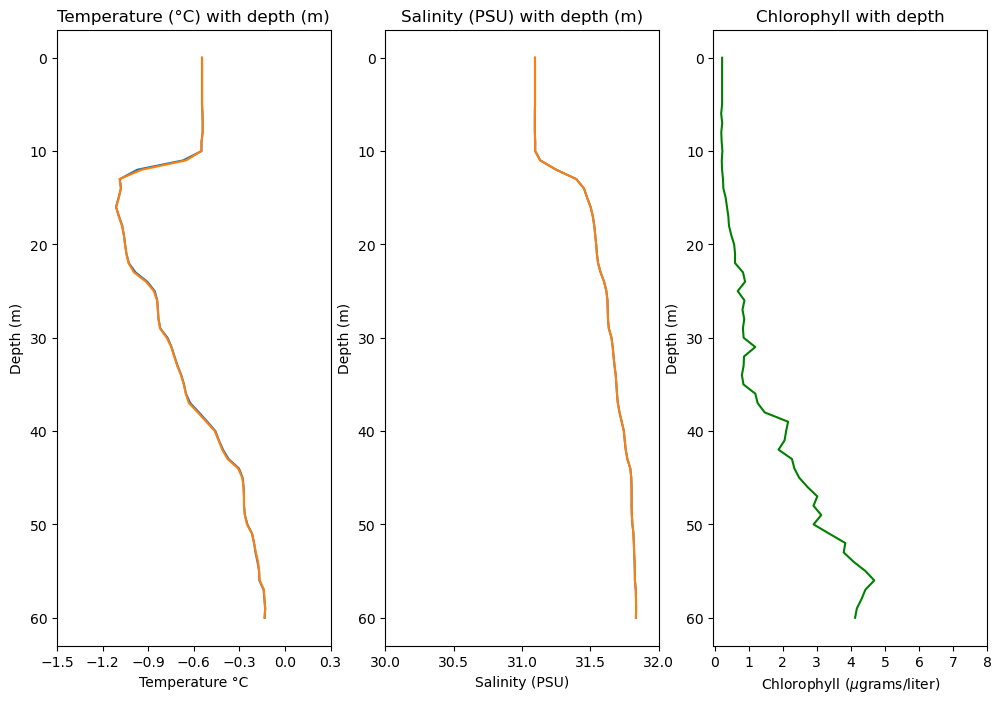

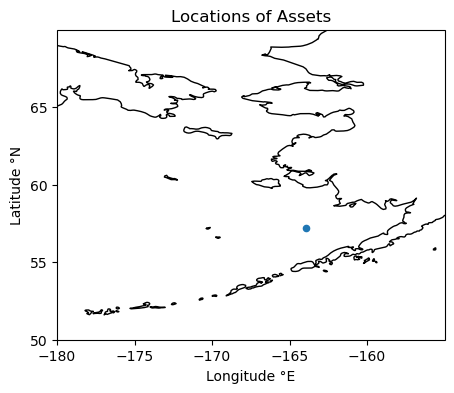

In [4]:
def plot_CTD_casts(CTD_num):
    temperature_ch1 = (CTD_num).temperature_ch1.values[0, 0, 0, :]
    temperature_ch2 = (CTD_num).temperature_ch2.values[0, 0, 0, :]
    salinity_ch1 = (CTD_num).salinity_ch1.values[0, 0, 0, :]
    salinity_ch2 = (CTD_num).salinity_ch2.values[0, 0, 0, :]
    chlor_fluorescence = (CTD_num).chlor_fluorescence.values[0, 0, 0, :]
    depth = (CTD_num).depth
    lat = (CTD_num).latitude
    lon = (CTD_num).longitude
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 8))
    ax[0].plot(temperature_ch1, depth)
    ax[0].plot(temperature_ch2, depth)
    ax[0].set_title('Temperature (°C) with depth (m)')
    ax[0].set_xlabel('Temperature °C')
    ax[0].set_ylabel('Depth (m)')
    ax[0].set_xticks(np.arange(-1.5, 0.5, 0.3))
    ax[0].invert_yaxis()
    
    
    ax[1].plot(salinity_ch1, depth)
    ax[1].plot(salinity_ch1, depth)
    ax[1].set_title('Salinity (PSU) with depth (m)')
    ax[1].set_xlabel('Salinity (PSU)')
    ax[1].set_ylabel('Depth (m)')
    ax[1].set_xticks(np.arange(30, 32.2, 0.5))
    ax[1].invert_yaxis()
     
    ax[2].plot(chlor_fluorescence, depth, color='green')
    ax[2].set_title('Chlorophyll with depth')
    ax[2].set_xlabel('Chlorophyll (${\mu}$grams/liter)')
    ax[2].set_ylabel('Depth (m)')
    ax[2].set_xticks(np.arange(0, 9, 1))
    ax[2].invert_yaxis()

    plt.figure(figsize=(5,5))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.set_extent([-180, -155, 50, 70], crs=ccrs.PlateCarree())
    ax.scatter(lon, lat, s=20, transform=ccrs.PlateCarree())
    ax.set_xticks(np.arange(-180, -155, 5), crs=ccrs.PlateCarree())
    ax.set_xlabel('Longitude °E')
    ax.set_ylabel('Latitude °N')
    ax.set_yticks(np.arange(50, 70, 5), crs=ccrs.PlateCarree())
    ax.set_title('Locations of Assets')


plot_CTD_casts(net_cdf_files['064'])

In [5]:
def plot_mult_CTDs(casts, nutrients, legend_key, title):
    fig, ax = plt.subplots(1, 4, figsize=(16, 9))
    for cast in casts:
        temperature_ch1 = (cast).temperature_ch1.values[0, 0, 0, :]
        #temperature_ch2 = (cast).temperature_ch2.values[0, 0, 0, :]
        salinity_ch1 = (cast).salinity_ch1.values[0, 0, 0, :]
        #salinity_ch2 = (cast).salinity_ch2.values[0, 0, 0, :]
        chlor_fluorescence = (cast).chlor_fluorescence.values[0, 0, 0, :]
        depth = (cast).depth
        lat = (cast).latitude
        lon = (cast).longitude
            .
        
        ax[0].plot(temperature_ch1, depth)
        #ax[0].plot(temperature_ch2, depth)
        
            
            
        ax[1].plot(salinity_ch1, depth)
        #ax[1].plot(salinity_ch1, depth)

             
        ax[2].plot(chlor_fluorescence, depth,)
        
        
    ax[0].set_title('Temperature (°C) with depth (m)')
    ax[0].set_xlabel('Temperature °C')
    ax[0].set_ylabel('Depth (m)')
    ax[0].set_xticks(np.arange(-1.5, 1, 0.5))
    ax[0].invert_yaxis()

    ax[1].set_title('Salinity (PSU) with depth (m)')
    ax[1].set_xlabel('Salinity (PSU)')
    ax[1].set_ylabel('Depth (m)')
    ax[1].set_xticks(np.arange(30, 32.2, 0.5))
    ax[1].invert_yaxis()
    
    ax[2].set_title('Chlorophyll with depth')
    ax[2].set_xlabel('Chlorophyll (${\mu}$grams/liter)')
    ax[2].set_ylabel('Depth (m)')
    ax[2].set_xticks(np.arange(0, 9, 1))
    ax[2].invert_yaxis()

    # ax_twin = ax[2].twiny()
    # ax_twin.set_xlabel('Nitrate (${\mu}$moles/liter)')
    # ax_twin.set_xticks(np.arange(0, 1.5, 0.25))
    # ax_twin.legend(['NO3'], loc='lower left')


    ax[3].set_xlabel('Nutrients (${\mu}$mol/liter)')
    ax[3].set_ylabel('Depth (m)')
    ax[3].set_ylim(0,50)
    ax[3].invert_yaxis()

    
    ax[3].scatter(nutrients.NO3.values, nutrients.pressure.values, color='green')
    ax[3].scatter(nutrients.NO2.values, nutrients.pressure.values, color='lightgreen')
    ax[3].scatter(nutrients.SI.values, nutrients.pressure.values, color='dodgerblue')
    ax[3].scatter(nutrients.PO4.values, nutrients.pressure.values, color='navy')
    ax[3].scatter(nutrients.NH4.values, nutrients.pressure.values, color='rebeccapurple')
    #ax[3].set_xticks(np.arange(0, 2, 0.5))
    ax[3].set_title('Nutrients with depth')
    
    #legend_key = [str(cast) for cast in casts]
    ax[0].legend(legend_key)
    ax[1].legend(legend_key)
    ax[2].legend(legend_key)
    ax[3].legend(['NO3', 'NO2', 'SI', 'PO4', 'NH4'])
    
    #ax[2].legend([], loc='lower left')
    #ax[2] = ax[2].twiny()
    #ax[2].set_xlabel('Nitrate (units?)')
    
    fig.suptitle(title)




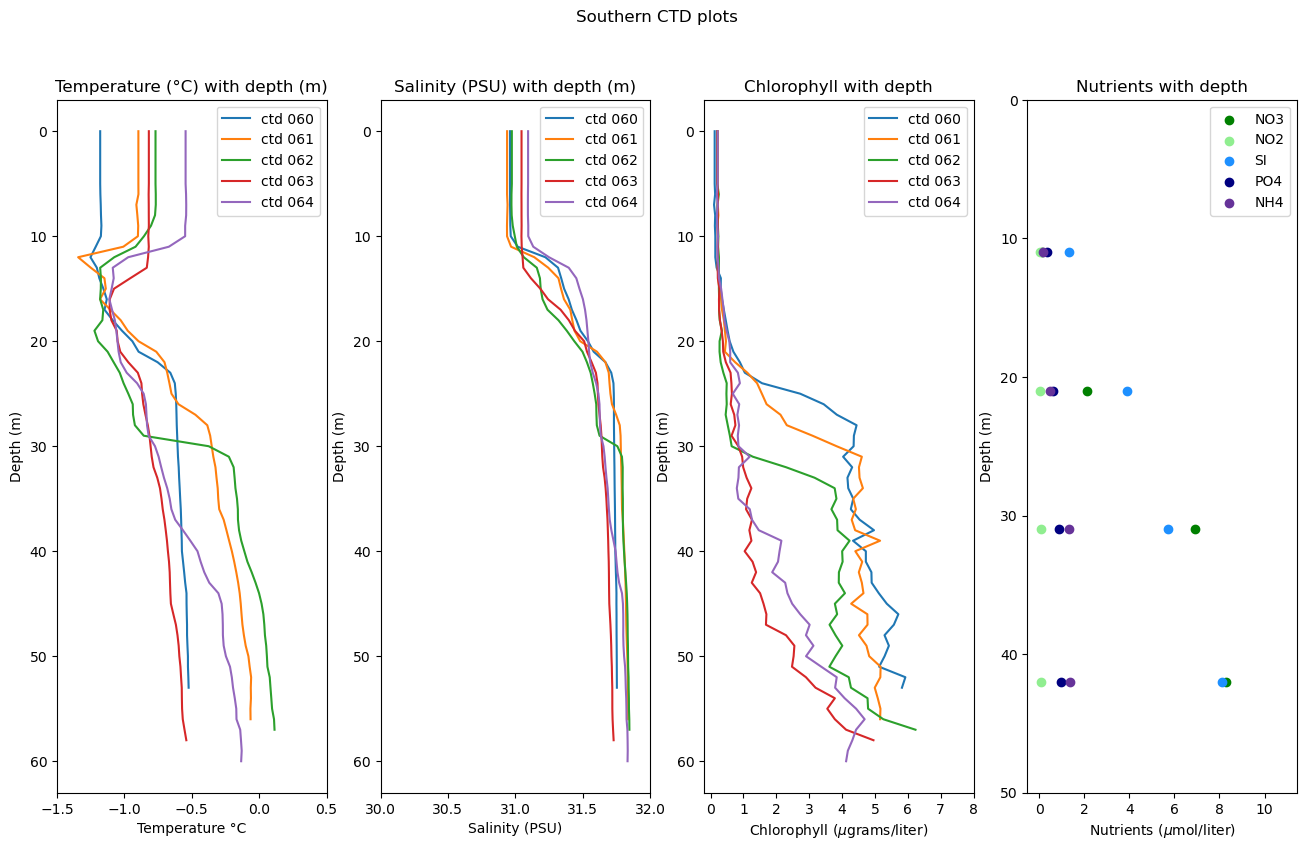

In [6]:
plot_mult_CTDs(casts = [net_cdf_files['060'], net_cdf_files['061'], net_cdf_files['062'], net_cdf_files['063'], net_cdf_files['064']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd061'], legend_key = ['ctd 060', 'ctd 061', 'ctd 062', 'ctd 063', 'ctd 064'], title='Southern CTD plots')

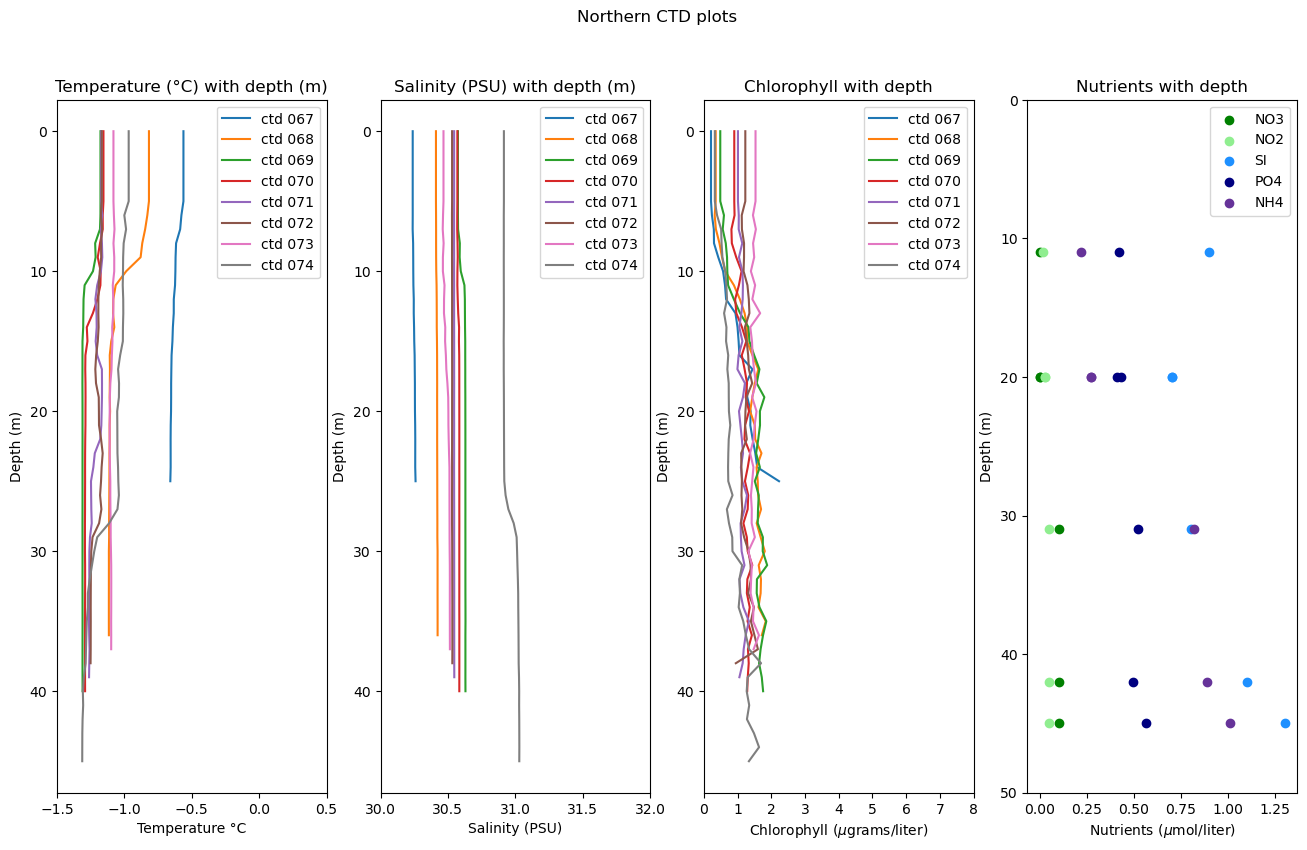

In [7]:
plot_mult_CTDs(casts = [net_cdf_files['067'], net_cdf_files['068'], net_cdf_files['069'], net_cdf_files['070'], net_cdf_files['071'], net_cdf_files['072'], net_cdf_files['073'], net_cdf_files['074']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd074'], legend_key = ['ctd 067', 'ctd 068', 'ctd 069', 'ctd 070', 'ctd 071', 'ctd 072', 'ctd 073', 'ctd 074'], title='Northern CTD plots')

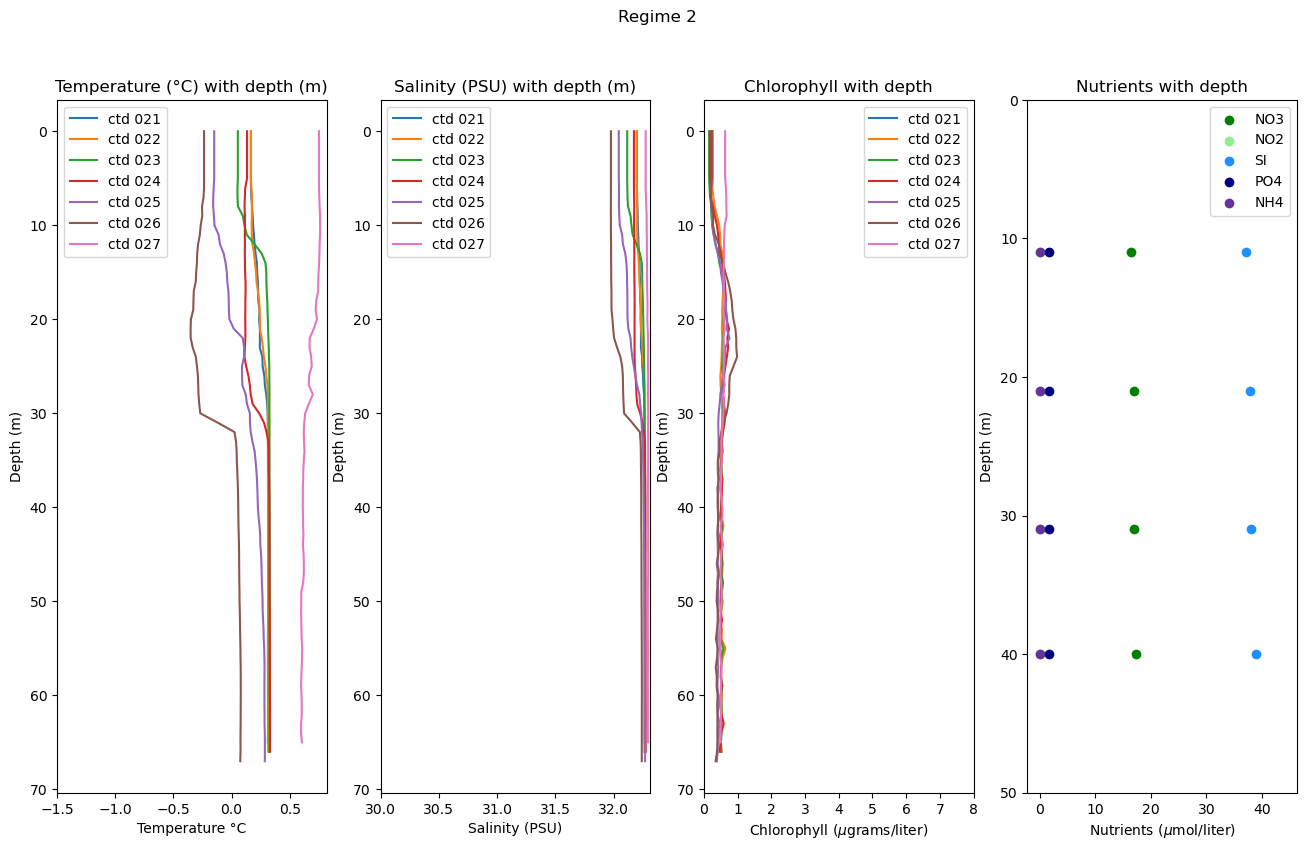

In [8]:
plot_mult_CTDs(casts = [net_cdf_files['021'], net_cdf_files['022'], net_cdf_files['023'], net_cdf_files['024'], net_cdf_files['025'], net_cdf_files['026'], net_cdf_files['028']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd027'], legend_key = ['ctd 021', 'ctd 022', 'ctd 023', 'ctd 024', 'ctd 025', 'ctd 026', 'ctd 027'], title='Regime 2')

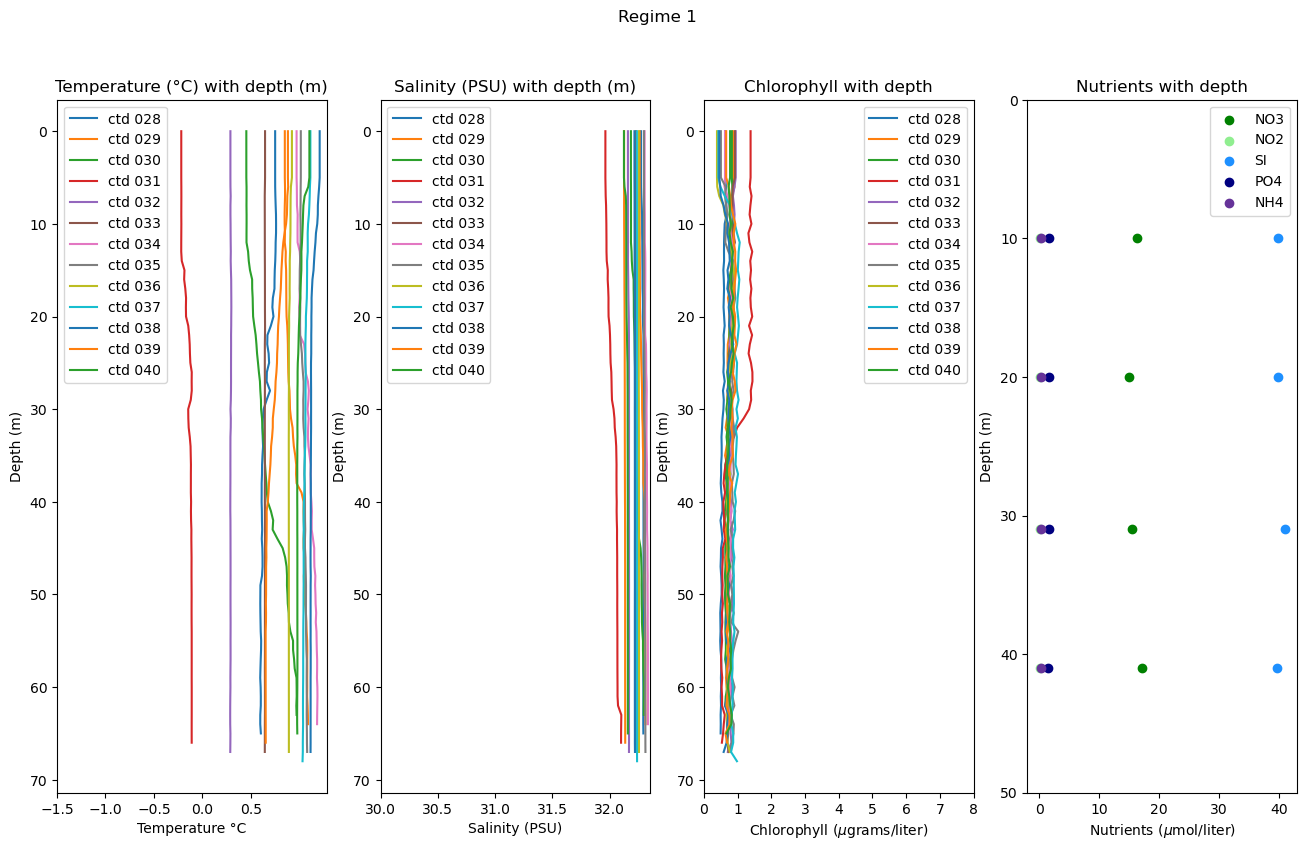

In [9]:
plot_mult_CTDs(casts = [net_cdf_files['028'], net_cdf_files['029'], net_cdf_files['030'], net_cdf_files['031'], net_cdf_files['032'], net_cdf_files['033'], net_cdf_files['034'], net_cdf_files['035'], net_cdf_files['036'], net_cdf_files['037'], net_cdf_files['038'], net_cdf_files['039'], net_cdf_files['040']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd033'], legend_key = ['ctd 028', 'ctd 029', 'ctd 030', 'ctd 031', 'ctd 032', 'ctd 033', 'ctd 034', 'ctd 035', 'ctd 036', 'ctd 037', 'ctd 038', 'ctd 039', 'ctd 040'], title='Regime 1')

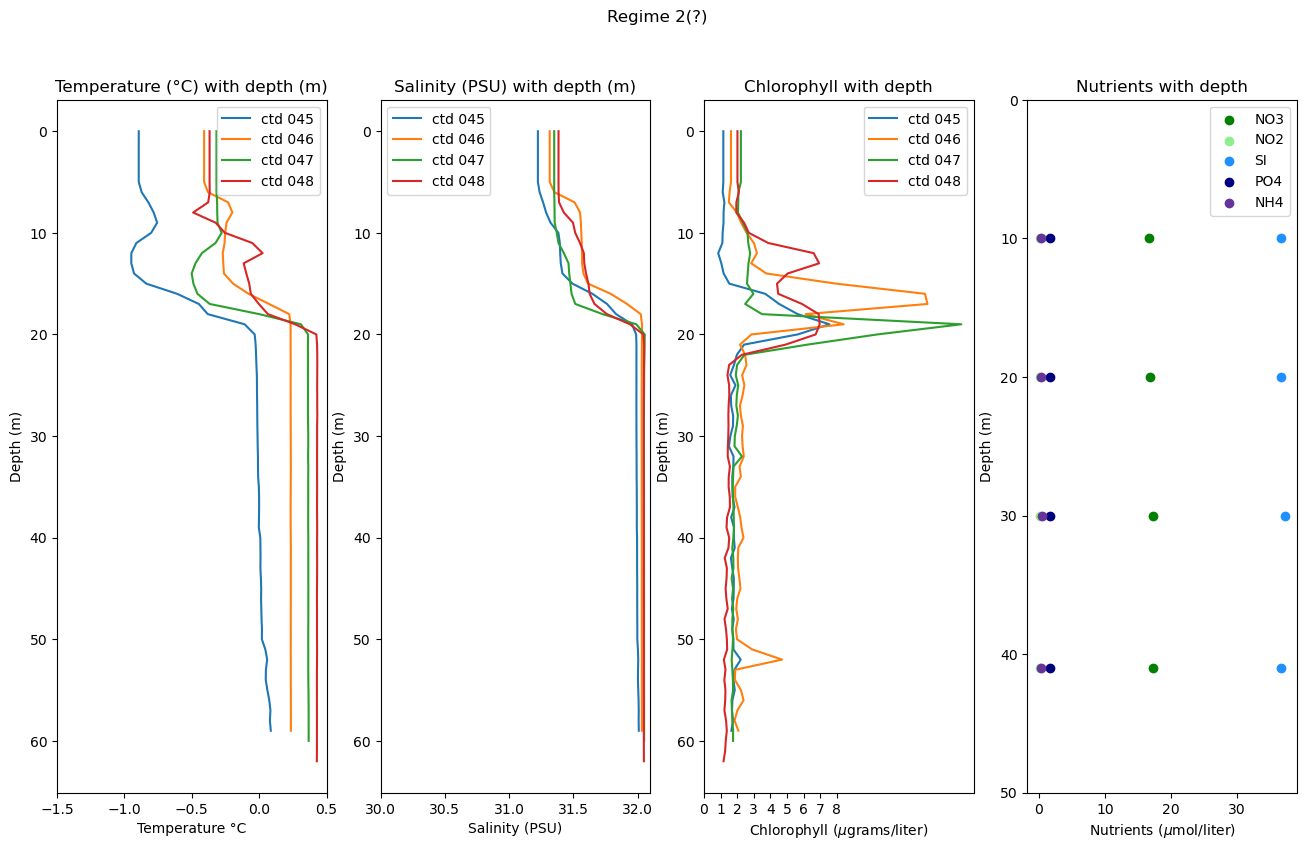

In [10]:
plot_mult_CTDs(casts = [net_cdf_files['045'], net_cdf_files['046'], net_cdf_files['047'], net_cdf_files['048']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd044'], legend_key = ['ctd 045', 'ctd 046', 'ctd 047', 'ctd 048'], title='Regime 2(?)')

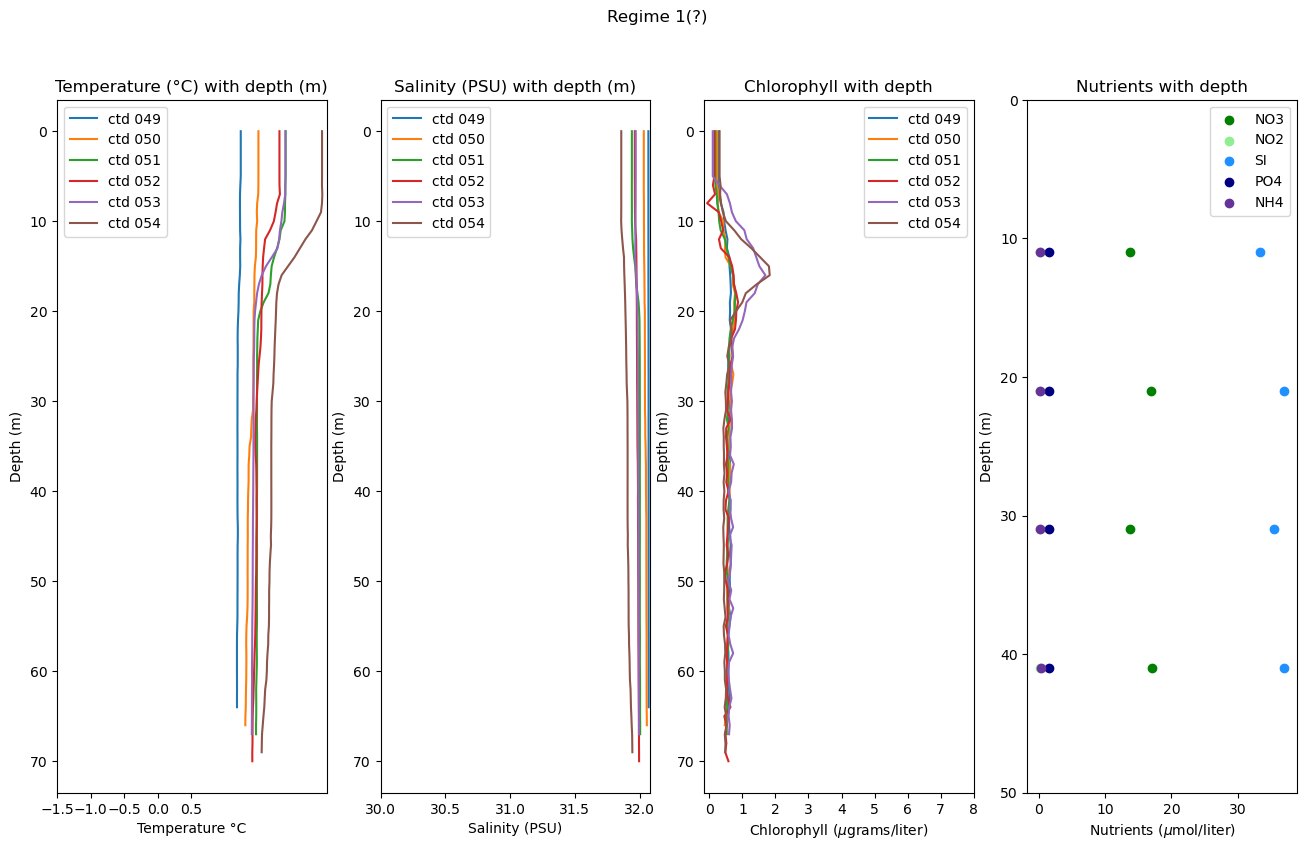

In [11]:
plot_mult_CTDs(casts = [net_cdf_files['049'], net_cdf_files['050'], net_cdf_files['051'], net_cdf_files['052'], net_cdf_files['053'], net_cdf_files['054']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd050'], legend_key = ['ctd 049', 'ctd 050', 'ctd 051', 'ctd 052' , 'ctd 053', 'ctd 054'], title='Regime 1(?)')

Text(0.5, 0.98, 'Southern CTD plots')

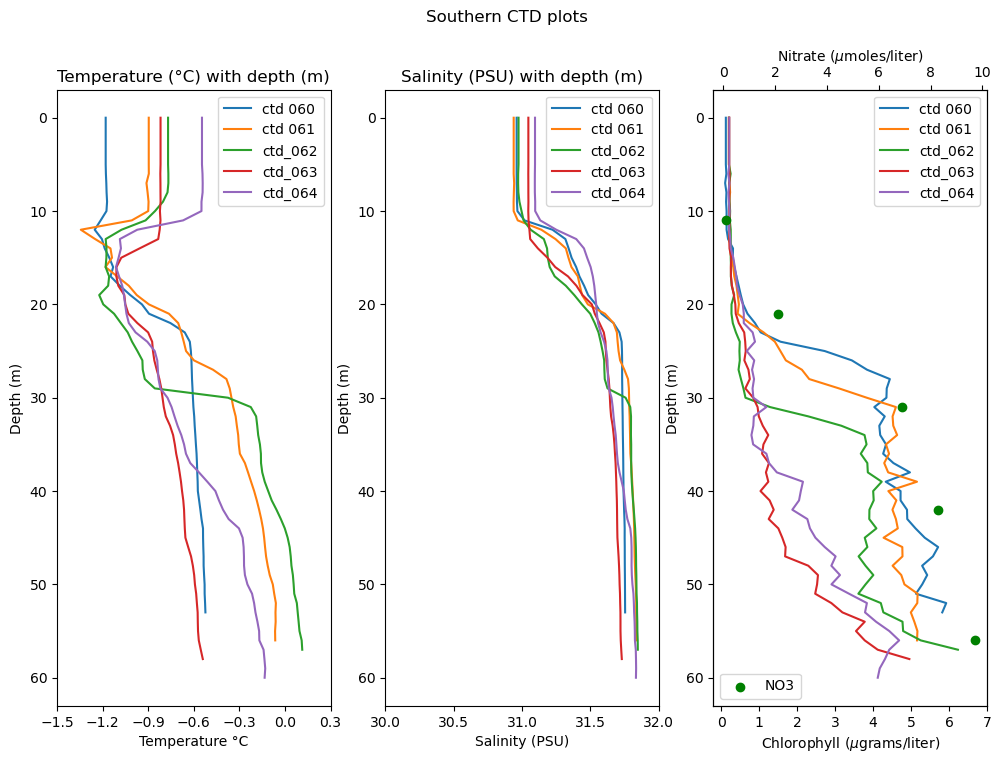

In [79]:
cast1 = net_cdf_files['060']
cast2 = net_cdf_files['061']
cast3 = net_cdf_files['062']
cast4 = net_cdf_files['063']
cast5 = net_cdf_files['064']

CTDs=[cast1, cast2, cast3, cast4, cast5]
fig, ax = plt.subplots(1, 3, figsize=(12, 8))
for cast in CTDs:
    temperature_ch1 = (cast).temperature_ch1.values[0, 0, 0, :]
    #temperature_ch2 = (cast).temperature_ch2.values[0, 0, 0, :]
    salinity_ch1 = (cast).salinity_ch1.values[0, 0, 0, :]
    #salinity_ch2 = (cast).salinity_ch2.values[0, 0, 0, :]
    chlor_fluorescence = (cast).chlor_fluorescence.values[0, 0, 0, :]
    depth = (cast).depth
    lat = (cast).latitude
    lon = (cast).longitude
        
    
    ax[0].plot(temperature_ch1, depth)
    #ax[0].plot(temperature_ch2, depth)
    
        
        
    ax[1].plot(salinity_ch1, depth)
    #ax[1].plot(salinity_ch1, depth)

         
    ax[2].plot(chlor_fluorescence, depth,)
    
    
ax[0].set_title('Temperature (°C) with depth (m)')
ax[0].set_xlabel('Temperature °C')
ax[0].set_ylabel('Depth (m)')
ax[0].set_xticks(np.arange(-1.5, 0.5, 0.3))
ax[0].invert_yaxis()

ax[1].set_title('Salinity (PSU) with depth (m)')
ax[1].set_xlabel('Salinity (PSU)')
ax[1].set_ylabel('Depth (m)')
ax[1].set_xticks(np.arange(30, 32.2, 0.5))
ax[1].invert_yaxis()

#ax[2].set_title('Chlorophyll + nitrates with depth')
ax[2].set_xlabel('Chlorophyll (${\mu}$grams/liter)')
ax[2].set_ylabel('Depth (m)')
ax[2].set_xticks(np.arange(0, 8, 1))
ax[2].invert_yaxis()

nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd061']
ax_twin = ax[2].twiny()
ax_twin.scatter(nutrients.NO3.values, nutrients.pressure.values, color='green')
ax_twin.set_xlabel('Nitrate (${\mu}$moles/liter)')

ax[0].legend(['ctd 060', 'ctd 061', 'ctd_062', 'ctd_063', 'ctd_064'])
ax[1].legend(['ctd 060', 'ctd 061', 'ctd_062', 'ctd_063', 'ctd_064'])

ax[2].legend(['ctd 060', 'ctd 061', 'ctd_062', 'ctd_063', 'ctd_064'])
ax_twin.legend(['NO3'], loc='lower left')
fig.suptitle('Southern CTD plots')

In [80]:
plot_mult_CTDs(casts = [net_cdf_files['080'], net_cdf_files['068'], net_cdf_files['069'], net_cdf_files['070'], net_cdf_files['071'], net_cdf_files['072'], net_cdf_files['073'], net_cdf_files['074']], nutrients = nutrients_prelim[nutrients_prelim['profile_id']== 'ctd074'], legend_key = ['ctd 067', 'ctd 068', 'ctd 069', 'ctd 070', 'ctd 071', 'ctd 072', 'ctd 073', 'ctd 074'], title='Northern CTD plots')

KeyError: '080'

In [ ]:
#Make this into a function (eventually)

#start with April track --> ice had been there for 1-2 weeks --> 60-64

#create arrays with locations for each track
CTD_april= [net_cdf_files['060'], net_cdf_files['061'], net_cdf_files['062'], net_cdf_files['063'], net_cdf_files['064']]
lat_apr = np.zeros(5)
lon_apr = np.zeros(5)

for i, name in enumerate(CTD_april): 
    lat_apr[i] = name.latitude
    lon_apr[i] = name.longitude

# now May track --> ice had been there for 1 month --> 67-74

CTD_may = [net_cdf_files['067'], net_cdf_files['068'], net_cdf_files['069'], net_cdf_files['070'], net_cdf_files['071'], net_cdf_files['072'], net_cdf_files['073'], net_cdf_files['074']]
lat_may = np.zeros(8)
lon_may = np.zeros(8)

for i, name in enumerate(CTD_may): 
    lat_may[i] = name.latitude
    lon_may[i] = name.longitude


plt.figure(figsize=(5,5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-164.5, -162, 57.5, 59], crs=ccrs.PlateCarree())
#ax.scatter(lon_apr, lat_apr, s=10, color='royalblue', transform=ccrs.PlateCarree())
ax.scatter(lon_may, lat_may, s=10, color='rebeccapurple', transform=ccrs.PlateCarree())
ax.set_xticks(np.arange(-164.5, -162, 0.5), crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude °E')
ax.set_ylabel('Latitude °N')
ax.set_yticks(np.arange(57.5, 59, 0.3), crs=ccrs.PlateCarree())
ax.set_title('Ice CTD Locations')
ax.arrow(lon_may[7]-0.05, lat_may[7], (lon_may[0]-lon_may[7]), (lat_may[0]-lat_may[7]), head_width = 0.05,  
           head_length = 0.05, fc ='darkred', ec ='darkred')
ax.arrow(lon_may[0]-0.1, lat_may[0], (lon_may[7]-lon_may[0]), (lat_may[7]-lat_may[0]), head_width = 0.05,  
           head_length = 0.05, fc ='navy', ec ='navy')
ax.legend(['May Casts', 'Time since ice melt', 'Maximum Sea Ice Concentration'], fontsize=7)
names = ['CTD_067', 'CTD_068', 'CTD_069', 'CTD_070', 'CTD_071', 'CTD_072', 'CTD_073', 'CTD_074']

for i, label in enumerate(names):
     ax.annotate(label, (lon_may[i], lat_may[i]), xytext=(lon_may[i], lat_may[i]), fontsize=7)



In [81]:
#plot ctd timeseries 
max_chlor=pd.DataFrame()

<bound method Figure.show of <Figure size 1800x1200 with 10 Axes>>

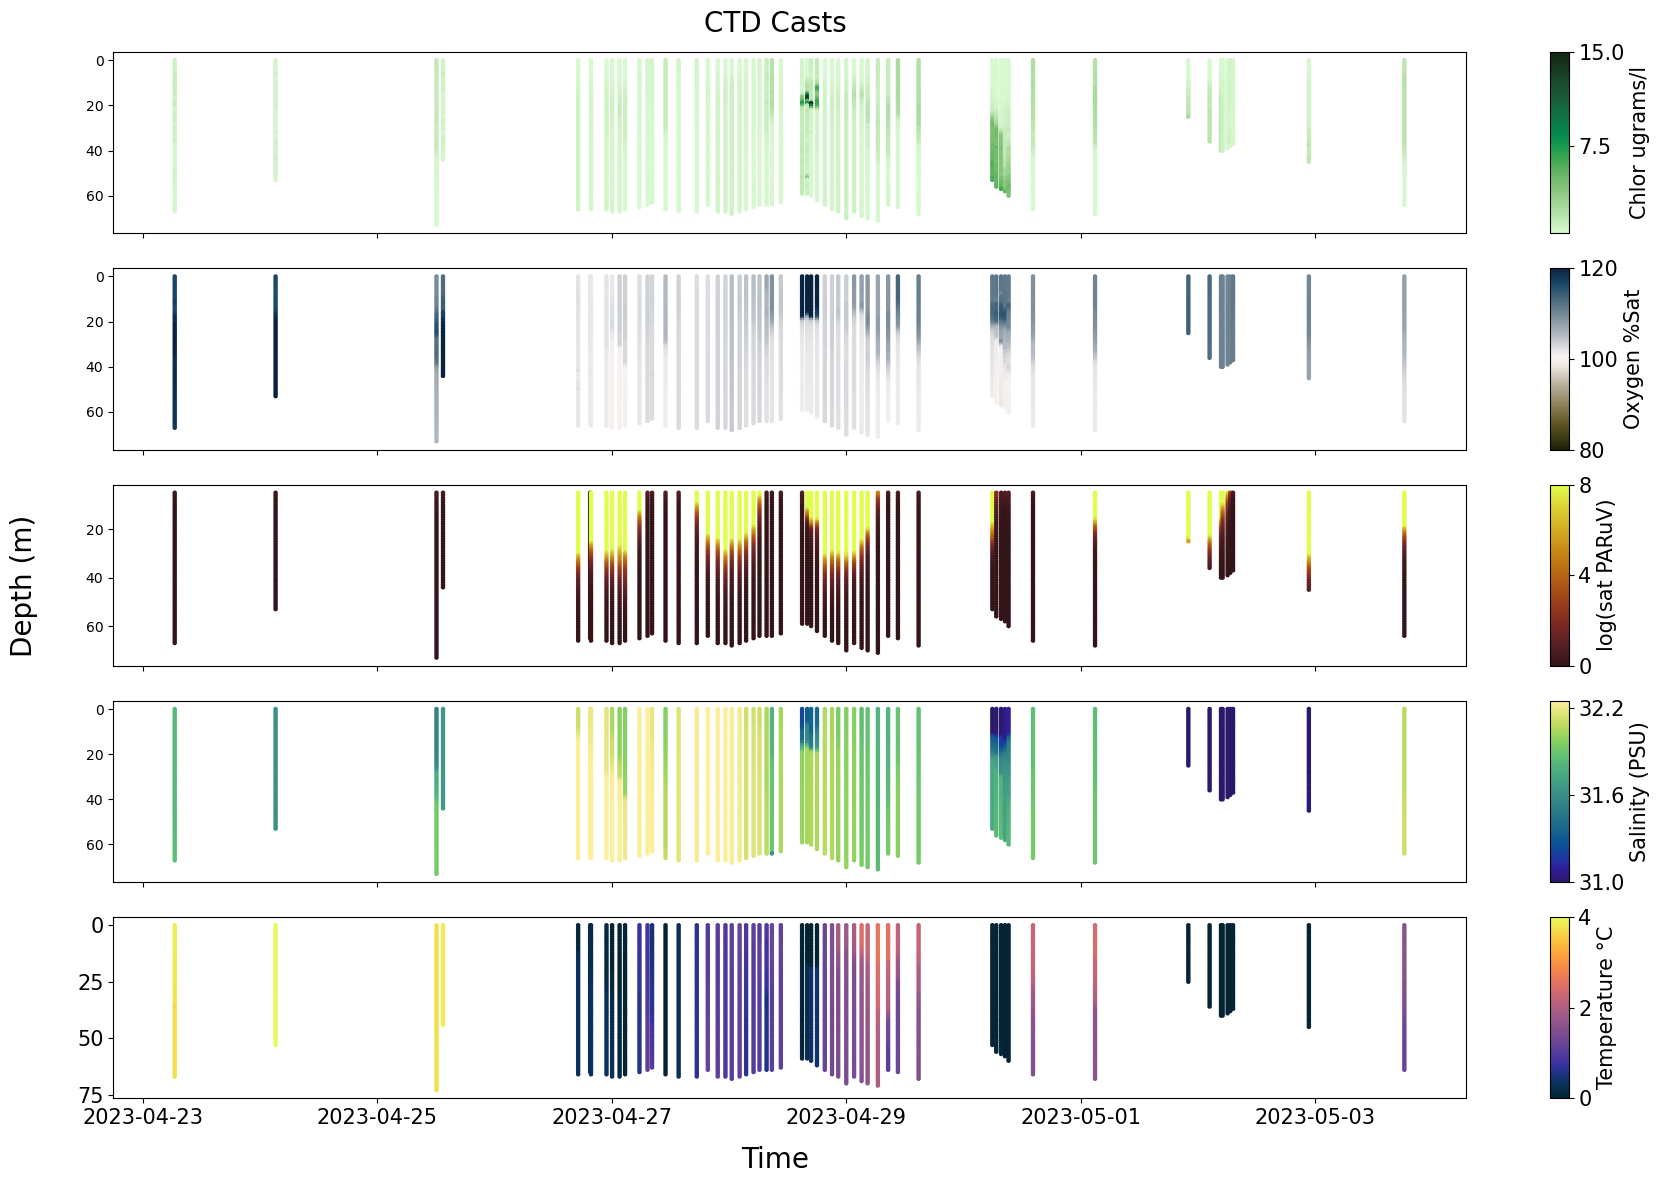

In [13]:
dotsize=5

plt.style.use(['default'])
fig, ax = plt.subplots(5,1,figsize=(18, 12), tight_layout=True)
for i, name in enumerate(net_cdf_files):
    chlor = (net_cdf_files[name].chlor_fluorescence.values[0, 0, 0, :])
    temp = (net_cdf_files[name].temperature_ch1.values[0, 0, 0, :])
    sal = net_cdf_files[name].salinity_ch1.values[0, 0, 0, :]
    par = net_cdf_files[name].par.values[0, 0, 0, :]
    oxy = net_cdf_files[name].oxy_percentsat_ch1.values[0, 0, 0, :]
    time = net_cdf_files[name].time.values[0]
    depth = net_cdf_files[name].depth.values
    time_array = np.empty(len(depth))
    for d in range(len(depth)):
        time_array[d] = time
    if max(depth) < 80: 
        c1 = ax[0].scatter(pd.to_datetime(time_array),depth,c=chlor,s=5,cmap=cmocean.cm.algae,vmax=15)
        
        c2 = ax[1].scatter(pd.to_datetime(time_array),depth,c=oxy,s=dotsize,vmin=80,vmax=120,cmap=cmocean.cm.diff_r)
        c3 = ax[2].scatter(pd.to_datetime(time_array),depth,c=par,s=dotsize,cmap=cmocean.cm.solar, vmin=0, vmax=8)
        
        c4 = ax[3].scatter(pd.to_datetime(time_array),depth,c=sal,s=dotsize,cmap=cmocean.cm.haline,vmin=31,vmax=32.25)
        c5 = ax[4].scatter(pd.to_datetime(time_array),depth,c=temp,s=dotsize,cmap=cmocean.cm.thermal,vmin=0,vmax=4)

chlor_cbar = plt.colorbar(c1,ax=ax[0], ticks=[0, 7.5, 15], aspect=10)
chlor_cbar.set_label('Chlor ugrams/l', size=15)
chlor_cbar.ax.tick_params(labelsize=15)
ax[0].invert_yaxis()
ax[0].tick_params(labelbottom=False)

oxy_cbar = plt.colorbar(c2,ax=ax[1], ticks=[80,100, 120], aspect=10)
oxy_cbar.set_label('Oxygen %Sat', size=15)
oxy_cbar.ax.tick_params(labelsize=15)
ax[1].invert_yaxis()
ax[1].tick_params(labelbottom=False)

PAR_cbar = plt.colorbar(c3,ax=ax[2], ticks = [0, 4.0, 8.0], aspect=10)
PAR_cbar.set_label('log(sat PARuV)', size=15)
PAR_cbar.ax.tick_params(labelsize=15)
ax[2].invert_yaxis()
ax[2].tick_params(labelbottom=False)

sal_cbar = plt.colorbar(c4,ax=ax[3], ticks = [31, 31.6, 32.2], aspect=10)
sal_cbar.set_label('Salinity (PSU)', size=15)
sal_cbar.ax.tick_params(labelsize=15)
ax[3].invert_yaxis()
ax[3].tick_params(labelbottom=False)

temp_cbar = plt.colorbar(c5,ax=ax[4], ticks = [0.0, 2.0, 4.0], aspect=10)
temp_cbar.set_label('Temperature °C', size=15)
temp_cbar.ax.tick_params(labelsize=15)
ax[4].invert_yaxis()
ax[4].tick_params(axis='y', labelsize=15)
ax[4].tick_params(axis='x', labelsize=15)

fig.suptitle('CTD Casts', x=0.42, fontsize=20)
fig.supxlabel("Time", x=0.42, fontsize=20)
fig.supylabel("Depth (m)", x=-0.005, fontsize=20)
fig.show